# Collected data

In [1]:
from feature_extraction import *
import pandas as pd
import numpy as np
from nice_plots import *

In [2]:
data = pd.read_csv("data3.csv")
data

,xAcc,yAcc,zAcc,xGyro,yGyro,zGyro,label
0,6.99,-0.57,-7.28,-2.75,-3.23,2.62,fall
1,6.51,-0.75,-6.93,-0.67,-6.35,4.64,fall
2,6.22,-0.63,-6.73,0.79,-5.49,3.85,fall
3,6.34,-0.62,-6.80,1.59,-2.26,0.67,fall
4,6.49,-0.39,-6.60,0.67,-0.24,-1.10,fall
...,...,...,...,...,...,...,...
96795,7.30,-1.16,-4.58,18.19,3.60,-35.77,light
96796,7.39,-0.37,-5.05,20.08,0.06,-34.55,light
96797,7.52,-1.46,-5.82,22.58,0.12,-28.02,light
96798,7.58,-2.14,-6.31,19.47,2.44,-22.52,light


# Explicit preprocessing

In [3]:
flat_data = flatten_ts(data)
flat_data

,xAcc_1,xAcc_2,xAcc_3,xAcc_4,xAcc_5,xAcc_6,xAcc_7,xAcc_8,xAcc_9,xAcc_10,...,zGyro_392,zGyro_393,zGyro_394,zGyro_395,zGyro_396,zGyro_397,zGyro_398,zGyro_399,zGyro_400,label
0,6.99,6.51,6.22,6.34,6.49,6.55,6.27,6.67,6.79,6.72,...,-0.67,-1.10,-1.34,-1.28,-1.04,-0.98,-0.98,-0.98,-1.10,fall
1,6.89,6.61,6.48,6.45,6.75,6.90,6.70,6.55,6.47,6.64,...,-0.43,-0.73,-0.85,-1.04,-1.04,-1.34,-0.79,-0.92,-0.67,fall
2,5.92,5.89,5.83,5.89,5.94,5.90,5.79,5.88,6.02,5.98,...,22.77,23.86,26.43,34.36,39.92,39.67,37.78,38.09,36.19,fall
3,6.88,6.49,6.41,6.09,5.62,5.67,7.41,12.76,7.47,6.55,...,0.06,3.05,1.46,-3.05,-3.78,-4.94,-4.21,-2.56,1.40,fall
4,6.56,6.12,6.17,6.41,6.35,5.88,5.36,5.16,12.62,9.95,...,-16.78,-24.23,-29.91,-28.75,-20.26,-9.89,-9.58,-18.62,-35.58,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,6.59,6.94,7.21,6.72,6.58,6.51,6.77,8.18,10.87,8.51,...,-6.47,-1.59,4.27,-4.70,-15.20,-17.40,-12.88,-16.66,-23.13,light
238,6.86,6.81,6.63,6.60,6.41,7.32,9.05,9.84,8.77,7.39,...,-14.71,-22.28,-26.18,-31.07,-37.66,-48.46,-50.66,-35.52,-21.06,light
239,6.78,8.19,7.49,7.53,6.69,8.30,8.30,7.21,6.68,6.70,...,16.24,18.68,18.80,18.31,14.28,5.86,4.33,15.14,24.60,light
240,8.42,8.20,7.70,8.13,8.70,8.70,8.16,7.48,7.65,7.78,...,-7.08,-10.86,-10.62,-5.62,1.71,11.35,15.69,18.62,22.95,light


In [4]:
warnings.filterwarnings('ignore')
df, labels = vec_sum(flat_data)
df["label"] = labels
df

,acc_1,acc_2,acc_3,acc_4,acc_5,acc_6,acc_7,acc_8,acc_9,acc_10,...,gyr_392,gyr_393,gyr_394,gyr_395,gyr_396,gyr_397,gyr_398,gyr_399,gyr_400,label
0,10.108581,9.537688,9.185761,9.317725,9.264567,9.625679,9.470449,9.866560,9.931556,9.772226,...,0.832226,1.108152,1.508940,1.350296,1.384558,1.316586,1.062873,0.996393,1.218113,fall
1,9.642505,9.398622,9.307653,9.317312,9.578157,9.677939,9.672518,9.602609,9.526610,9.640954,...,0.755910,1.080139,1.166619,1.393198,1.229349,1.508575,1.302728,1.196746,1.042785,fall
2,9.661987,9.639725,9.577270,9.591632,9.661698,9.597072,9.501800,9.647844,9.755275,9.684782,...,36.741091,35.978113,39.397108,45.323665,50.354353,51.365726,49.815388,50.785400,42.545700,fall
3,9.480295,8.876773,8.682062,8.864181,8.687900,8.705142,9.638350,17.116331,10.001335,8.002706,...,5.678010,9.178181,9.709485,7.585269,6.007537,6.188667,5.522871,6.093423,10.975719,fall
4,9.567241,9.223112,9.656159,9.535397,9.125322,8.799966,8.890231,9.637935,15.429051,11.867860,...,25.946726,28.139966,31.458948,28.856559,20.350327,9.901773,10.485676,20.769095,45.044041,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9.170093,9.273748,9.343463,9.500316,9.085670,9.075230,9.275139,11.338188,12.609592,10.298942,...,24.157347,14.040239,4.396464,12.434846,38.257195,49.500611,52.183440,56.153815,51.446970,light
238,9.022505,9.271451,9.181166,9.263369,9.303322,9.903297,11.889706,12.140906,10.008227,8.930291,...,16.680126,22.309641,26.740989,36.154228,52.353129,67.389355,65.728835,38.954941,21.060769,light
239,7.912073,9.007675,8.720384,10.116961,9.617723,10.637171,10.104375,9.309882,9.280781,9.631895,...,27.804604,30.426965,30.604902,30.377567,24.071066,8.991780,5.798396,17.283695,27.881836,light
240,9.129847,8.806730,9.078882,10.509943,10.325803,9.800066,9.796203,9.374711,9.540325,9.469789,...,14.292617,14.283893,12.658535,6.578982,7.462721,15.174574,18.183570,21.144408,29.404588,light


# Plotting time

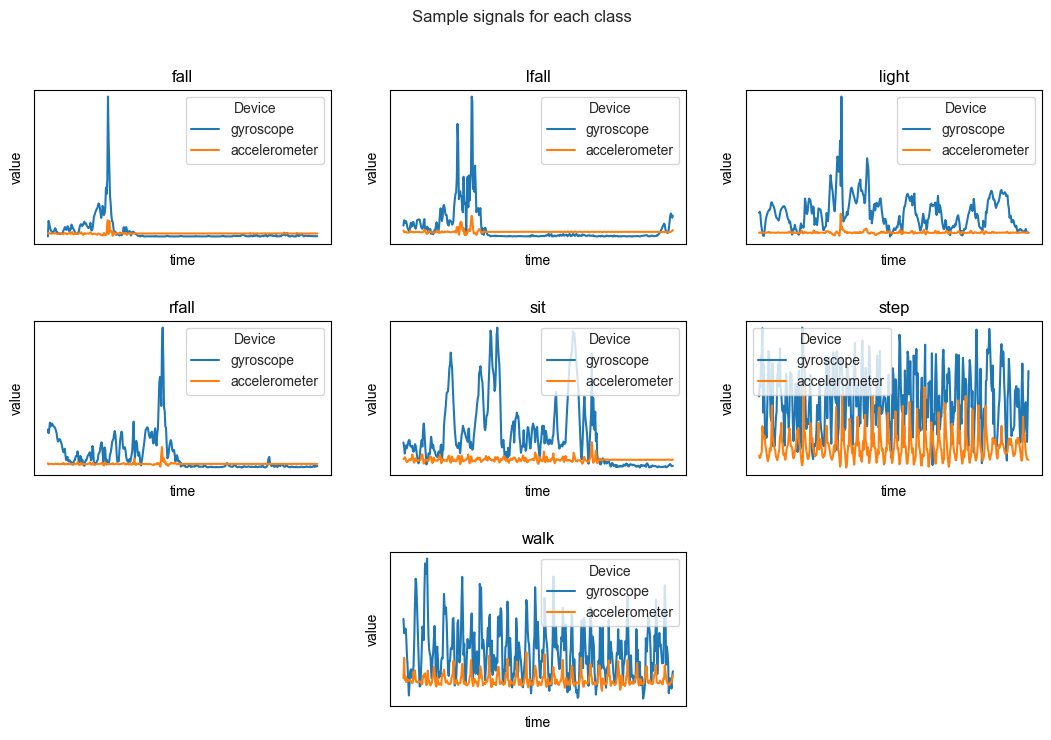

In [25]:
# Select one row for each different label class
sampled_rows = df.groupby('label').apply(lambda x: x.sample(1, random_state=123))

signal_plot(sampled_rows)

### FFT Magnitude

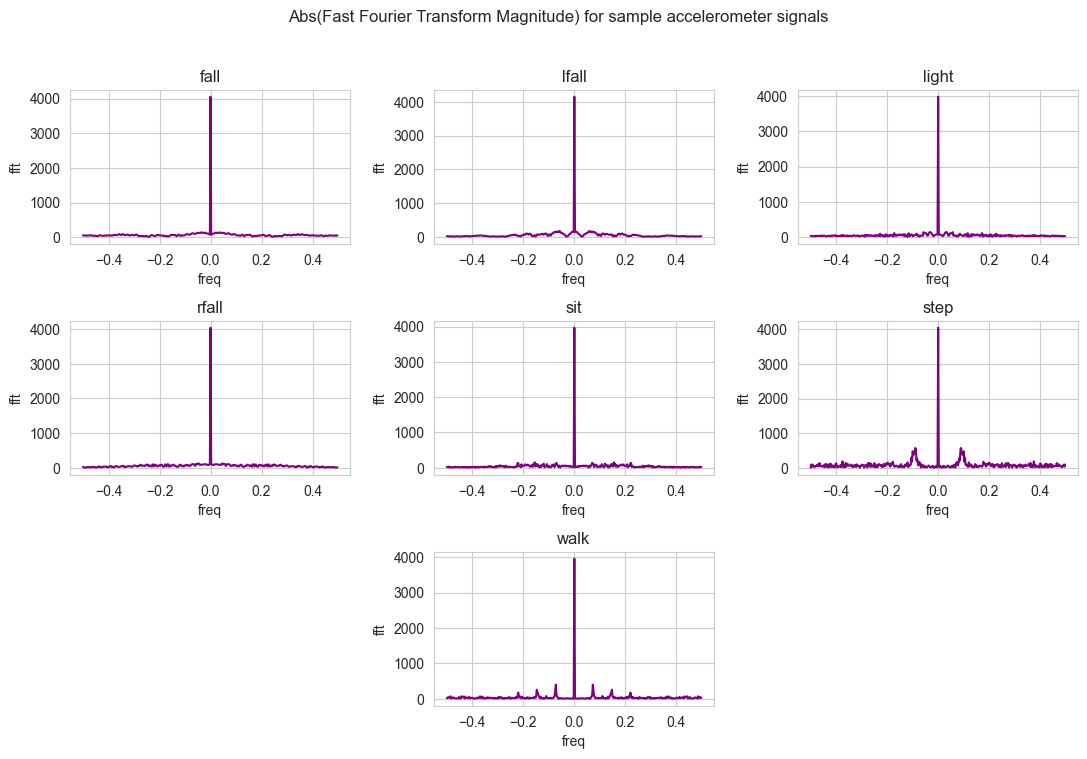

In [6]:
fft_plot(sampled_rows, "accelerometer")

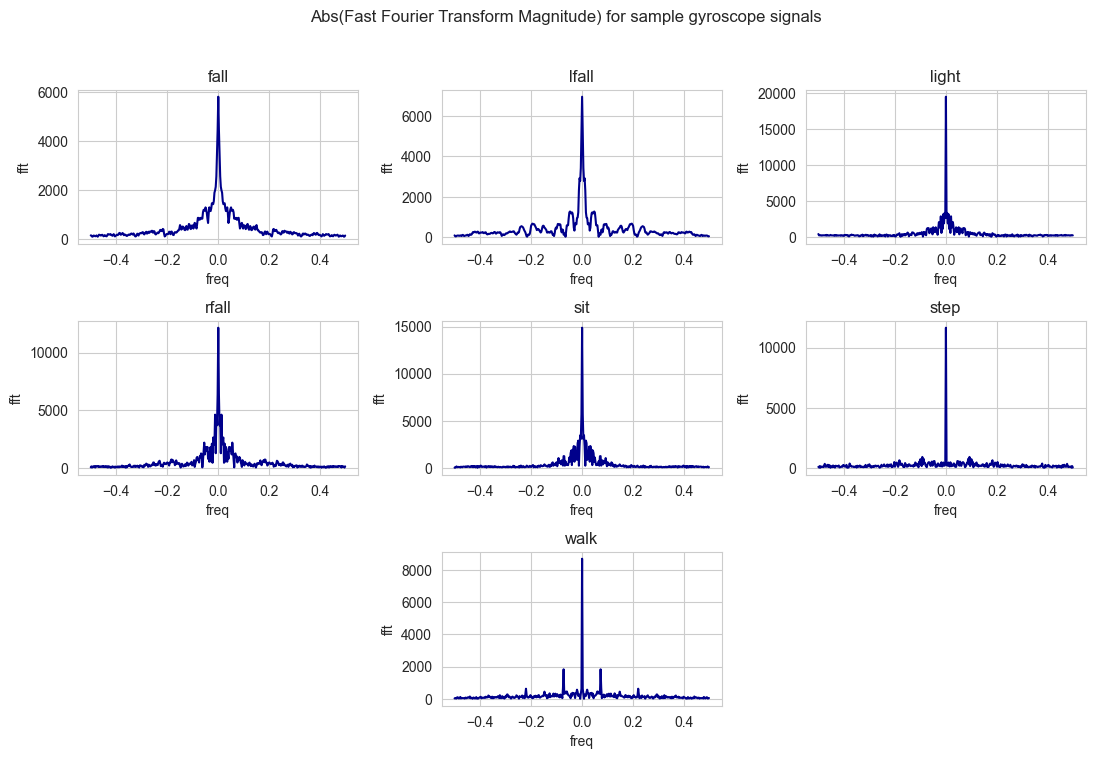

In [6]:
fft_plot(sampled_rows, "gyroscope")

### Power spectrum peaks

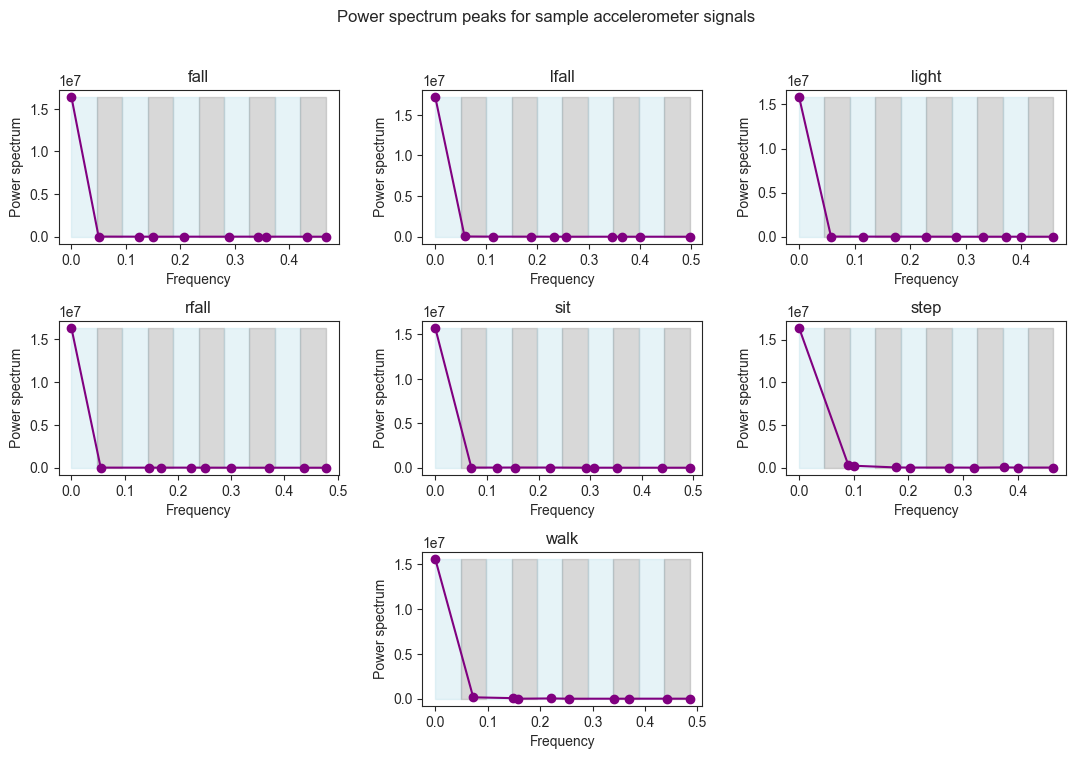

In [7]:
maxbin_plot(sampled_rows, "accelerometer")

Note that for the accelerometer the magnitude at frequence=0 is the same for each type of signal. This is not true for the gyroscope since it seems that for every signal has a peak at freq=0 BUT this peak has different magnitude in each case

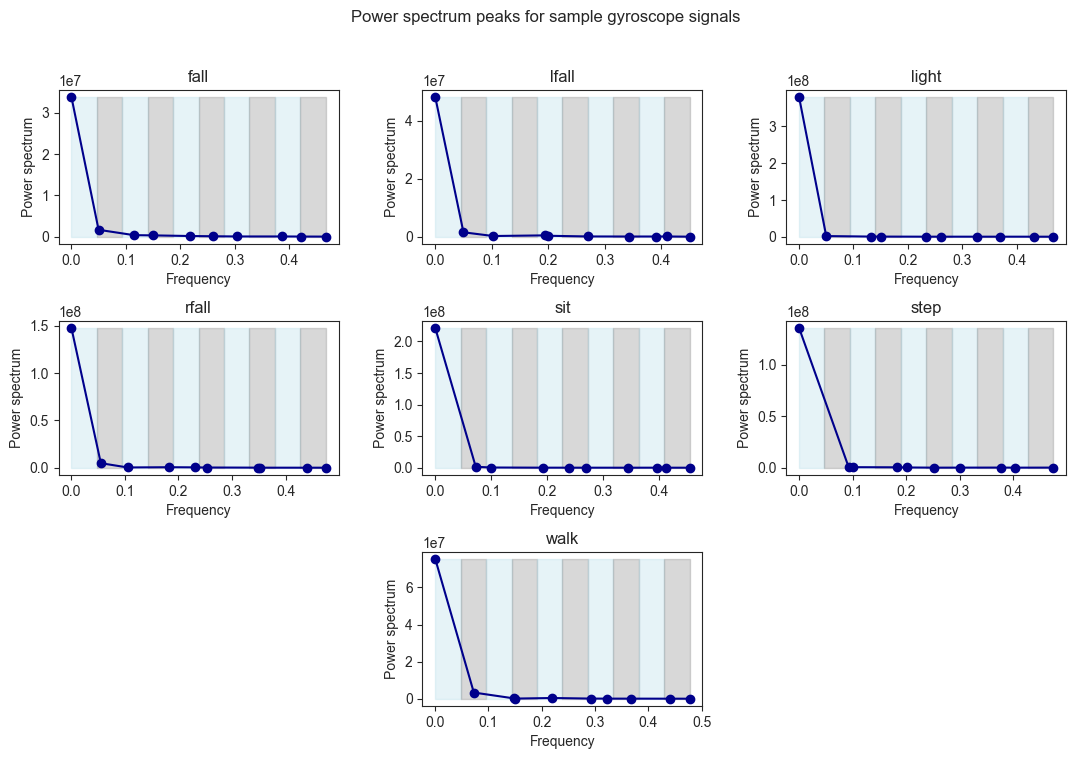

In [8]:
maxbin_plot(sampled_rows, "gyroscope")

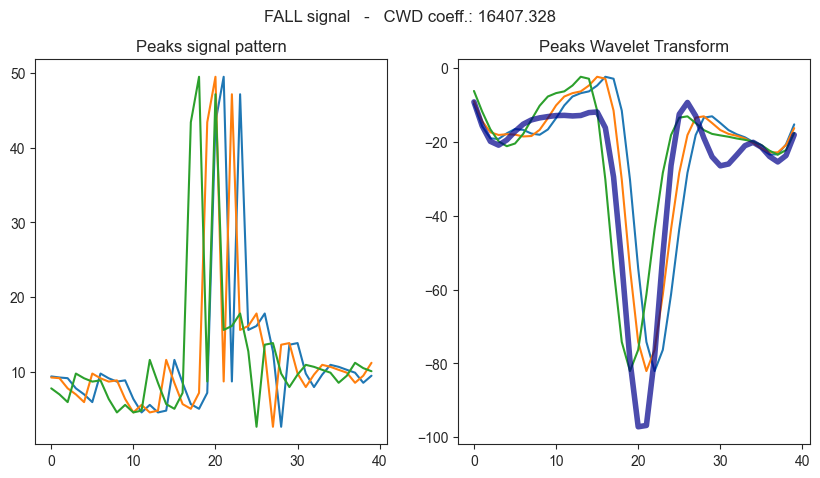

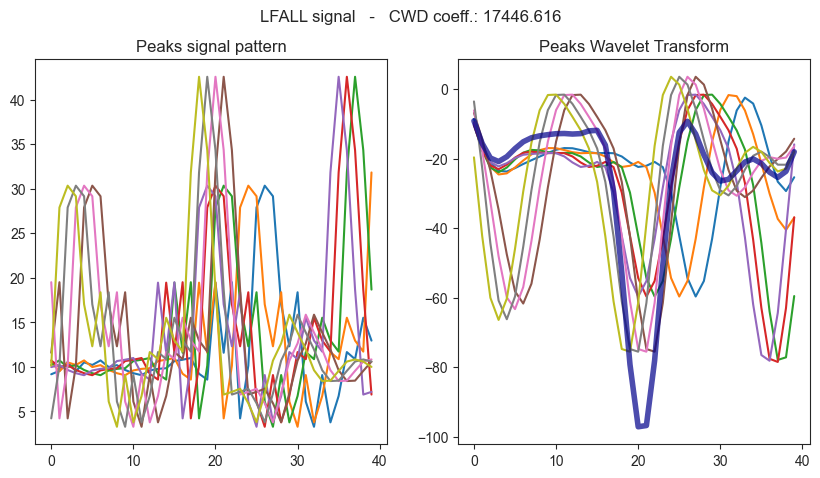

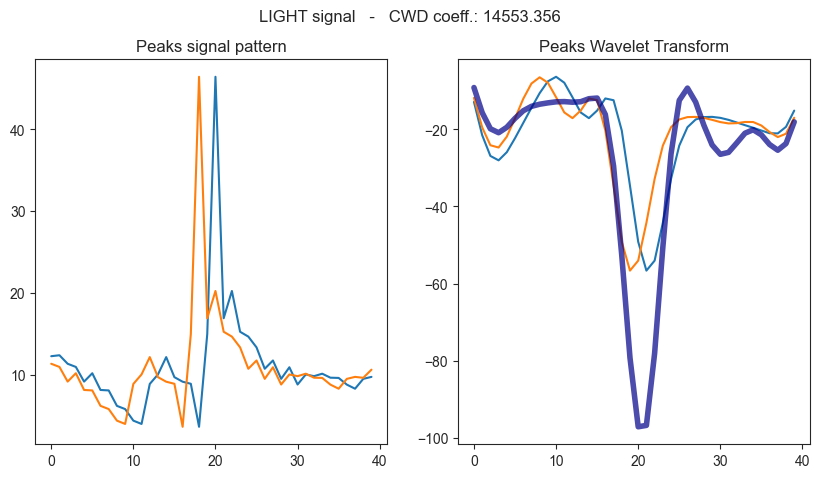

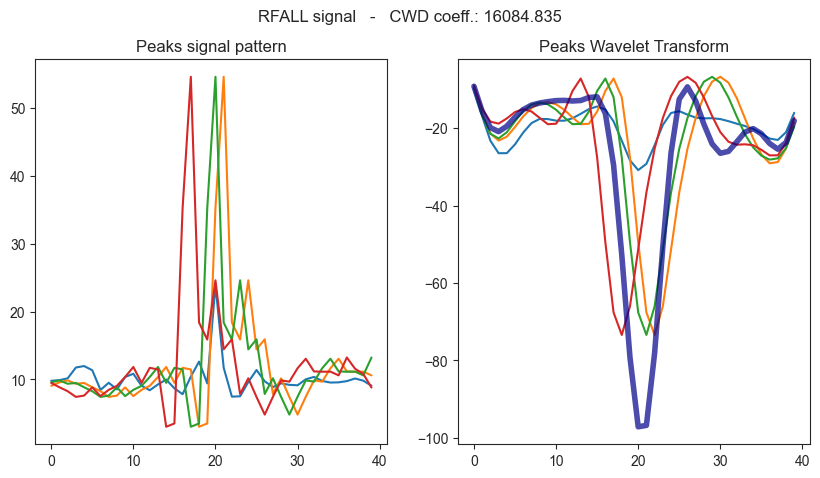

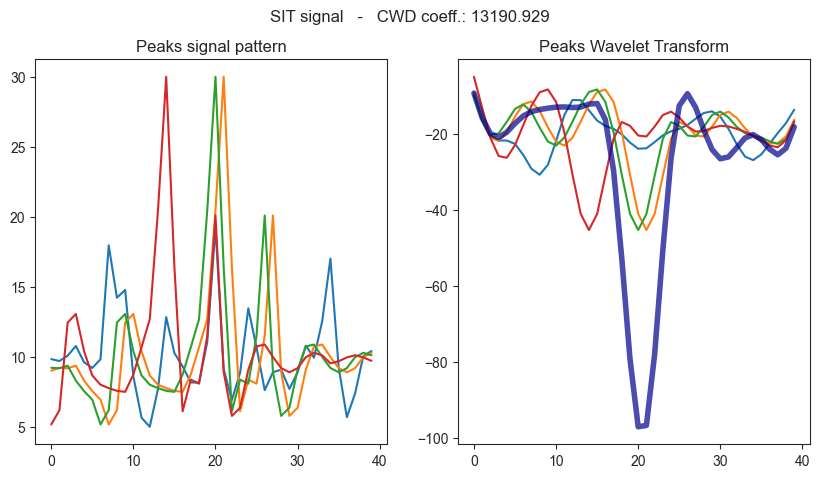

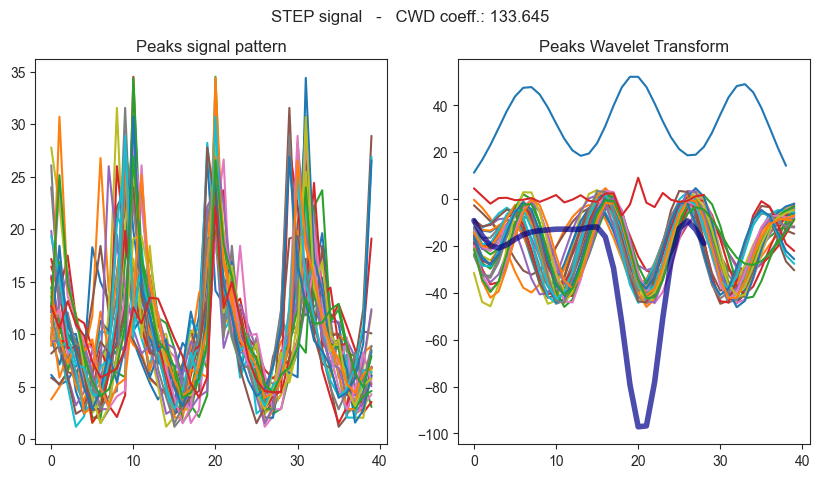

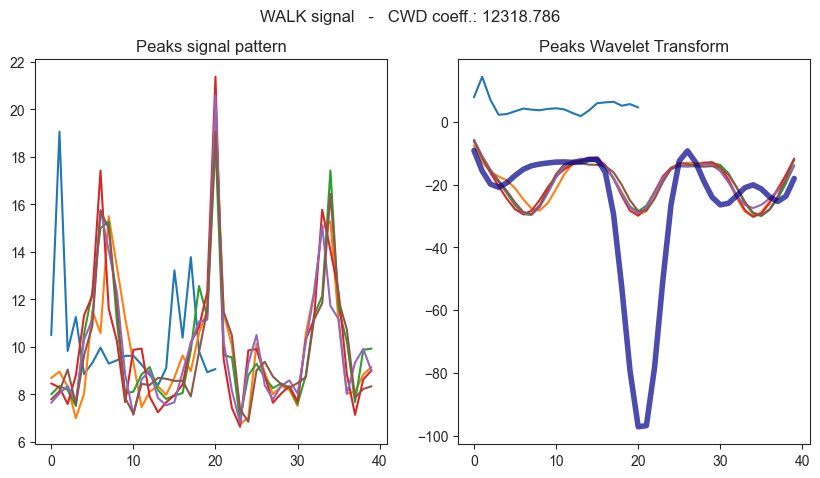

In [9]:
mother_wave = extract_wave_df("file_csv")

for label, row in sampled_rows.iterrows():
    vec = np.array(row[:-1], dtype=np.float32)[:400]
    res = peakes_wavelet_approx(vec, mother_wave, True, label[0])

# Final preprocessed data set

In [4]:
prova = preproc(data, 15)
prova

c:\Users\nicol\Desktop\esami_sapienza\primo_anno_secondo_sem\statistical_learning\project\Fall_or_not_to_fall\feature_extraction.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[[f'acc_{i+1}' for i in range(chunk_size)]] = pd.DataFrame(new_data.acc_sum.to_list(), index = new_data.index)
c:\Users\nicol\Desktop\esami_sapienza\primo_anno_secondo_sem\statistical_learning\project\Fall_or_not_to_fall\feature_extraction.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[[f'acc_{i+1}' for i in range(chunk_size)]] = pd.DataFr

,acc_max_mag_1,acc_max_mag_2,acc_max_mag_3,acc_max_mag_4,acc_max_mag_5,gyr_max_mag_1,gyr_max_mag_2,gyr_max_mag_3,gyr_max_mag_4,gyr_max_mag_5,acc_psd1,acc_psd2,acc_psd3,gyr_psd1,gyr_psd2,gyr_psd3,cwt_coeff,label
0,1.679561e+07,18721.154353,7100.335747,15443.379045,11696.480495,1.077492e+08,5.017116e+06,6.787773e+05,2.100723e+05,511951.143950,7.264484,21.605317,2.266248,335.528281,6683.819118,10.060861,17894.295581+211.674039j,fall
1,1.666644e+07,17096.038339,5345.825318,22126.371544,16797.181146,2.970916e+08,5.963252e+06,1.876670e+06,6.657685e+05,465629.751594,9.428514,19.359462,1.741056,525.734259,8445.535938,12.842785,16990.389143+277.574760j,fall
2,1.690417e+07,22413.999497,14913.810039,18483.969593,13990.673765,4.304287e+08,8.412478e+06,1.644419e+06,7.335214e+05,671668.798449,11.073100,25.433874,1.874920,296.404199,6752.523845,8.763110,16036.117872+169.989151j,fall
3,1.690057e+07,18798.728822,27834.293492,58377.754093,30326.288200,5.162937e+08,9.091154e+06,1.965535e+06,6.057332e+05,683876.245125,9.131326,26.921273,3.127359,348.643022,8965.268444,10.819895,12729.036464+240.259183j,fall
4,1.742747e+07,17572.669139,99254.848523,124734.902539,34418.850456,3.574267e+08,3.717381e+06,2.053406e+06,1.452541e+06,843492.824657,12.425194,31.434656,6.207779,668.548802,6688.750331,9.785420,15160.304091+235.292985j,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.638037e+07,20099.923295,7037.623252,11433.622947,7151.947063,3.005802e+08,1.076573e+07,3.910192e+06,7.194042e+05,389663.003137,6.840570,15.026079,2.081657,153.232435,4807.971407,5.426481,16232.383518+218.855183j,light
238,1.660464e+07,15692.281489,14302.864306,19305.212301,4545.408630,3.665159e+08,5.740845e+06,1.563710e+06,5.912486e+05,565309.135195,5.550793,11.241446,2.417584,227.597167,5924.778843,5.529446,12719.166920+247.218585j,light
239,1.612340e+07,25131.303791,14680.610706,5905.058076,7903.859218,2.961041e+08,5.159878e+06,1.533535e+06,1.211368e+06,795695.965727,10.788574,15.292856,2.242325,238.547673,5273.231796,5.532851,16413.248317+264.553910j,light
240,1.613424e+07,11934.645653,6998.180669,9199.815170,15515.727474,4.060575e+08,3.279267e+06,1.497185e+06,1.246336e+06,217021.252937,3.716582,11.827115,2.076557,203.839857,4587.081041,8.481311,15759.100125+247.294855j,light


In [5]:
labels = prova["label"]
prova = prova.drop("label", axis=1)

In [6]:
prova

,acc_max_mag_1,acc_max_mag_2,acc_max_mag_3,acc_max_mag_4,acc_max_mag_5,gyr_max_mag_1,gyr_max_mag_2,gyr_max_mag_3,gyr_max_mag_4,gyr_max_mag_5,acc_psd1,acc_psd2,acc_psd3,gyr_psd1,gyr_psd2,gyr_psd3,cwt_coeff
0,1.679561e+07,18721.154353,7100.335747,15443.379045,11696.480495,1.077492e+08,5.017116e+06,6.787773e+05,2.100723e+05,511951.143950,7.264484,21.605317,2.266248,335.528281,6683.819118,10.060861,17894.295581+211.674039j
1,1.666644e+07,17096.038339,5345.825318,22126.371544,16797.181146,2.970916e+08,5.963252e+06,1.876670e+06,6.657685e+05,465629.751594,9.428514,19.359462,1.741056,525.734259,8445.535938,12.842785,16990.389143+277.574760j
2,1.690417e+07,22413.999497,14913.810039,18483.969593,13990.673765,4.304287e+08,8.412478e+06,1.644419e+06,7.335214e+05,671668.798449,11.073100,25.433874,1.874920,296.404199,6752.523845,8.763110,16036.117872+169.989151j
3,1.690057e+07,18798.728822,27834.293492,58377.754093,30326.288200,5.162937e+08,9.091154e+06,1.965535e+06,6.057332e+05,683876.245125,9.131326,26.921273,3.127359,348.643022,8965.268444,10.819895,12729.036464+240.259183j
4,1.742747e+07,17572.669139,99254.848523,124734.902539,34418.850456,3.574267e+08,3.717381e+06,2.053406e+06,1.452541e+06,843492.824657,12.425194,31.434656,6.207779,668.548802,6688.750331,9.785420,15160.304091+235.292985j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.638037e+07,20099.923295,7037.623252,11433.622947,7151.947063,3.005802e+08,1.076573e+07,3.910192e+06,7.194042e+05,389663.003137,6.840570,15.026079,2.081657,153.232435,4807.971407,5.426481,16232.383518+218.855183j
238,1.660464e+07,15692.281489,14302.864306,19305.212301,4545.408630,3.665159e+08,5.740845e+06,1.563710e+06,5.912486e+05,565309.135195,5.550793,11.241446,2.417584,227.597167,5924.778843,5.529446,12719.166920+247.218585j
239,1.612340e+07,25131.303791,14680.610706,5905.058076,7903.859218,2.961041e+08,5.159878e+06,1.533535e+06,1.211368e+06,795695.965727,10.788574,15.292856,2.242325,238.547673,5273.231796,5.532851,16413.248317+264.553910j
240,1.613424e+07,11934.645653,6998.180669,9199.815170,15515.727474,4.060575e+08,3.279267e+06,1.497185e+06,1.246336e+06,217021.252937,3.716582,11.827115,2.076557,203.839857,4587.081041,8.481311,15759.100125+247.294855j


In [7]:
prova["cwt_coeff"] = np.abs(prova["cwt_coeff"] )
X = prova
y = labels

## LINEAR CLASSIFIERS


#### Required libraries

In [8]:
from sklearn.preprocessing import StandardScaler, label_binarize
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score,balanced_accuracy_score, classification_report, roc_curve, auc
# for first and future models
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns


## STOCHASTIC GRADIEND DESCENT

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model.


The advantages of Stochastic Gradient Descent are:

- Efficiency.

- Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:

- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

- SGD is sensitive to feature scaling.

We must be sure of permuting (shuffle) training data before fitting the model or use shuffle=True to shuffle after each iteration (used by default) because in these optimization algorithms, only a subset (mini-batch) of the data is used in each iteration. Shuffling ensures that each mini-batch is a random sample from the dataset, reducing the chance of biased updates and making the optimization process more stable.

SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the classes, a binary classifier is learned that discriminates between that and all other classes. At testing time, we compute the confidence score (i.e. the signed distances to the hyperplane) for each classifier and choose the class with the highest confidence. The figure below illustrates the OVA approach on the on our dataset considering only 2 features to visualize a 2-d plot. The dashed lines represent the seven OVA classifiers; the background colors show the decision surface induced by the seven classifiers. We used deafult options for the classifiers, only to show how it works. 


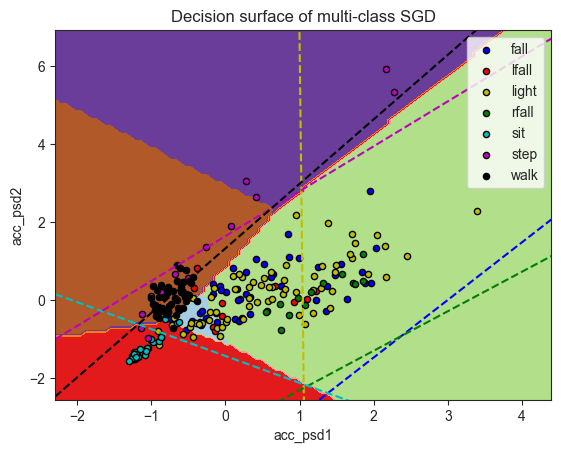

In [28]:

# Assuming 'prova' is your DataFrame and 'y' is the target variable

# Create a mapping of class labels to integers
class_label_mapping = {label: idx for idx, label in enumerate(np.unique(y))}
# Convert class labels to integers
y_int = np.array([class_label_mapping[label] for label in y])

# Extract the features for plotting
X = prova[['acc_psd1', 'acc_psd2']]  # Replace with your actual column names

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X.iloc[idx]
y_int = y_int[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y_int)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel='acc_psd1',
    ylabel='acc_psd2',  # Replace with your feature names
)
plt.axis("tight")

# Define a list of colors for each class
colors = ["b", "r", "y", "g", "c", "m", "k"]  # Add more colors as needed

# Get the unique class labels from 'y'
unique_labels = np.unique(y)

# Plot the training points for each class with actual labels
for i, color, label in zip(np.unique(y_int), colors, unique_labels):
    plt.scatter(
        X[y_int == i]['acc_psd1'],
        X[y_int == i]['acc_psd2'],
        c=color,
        label=label,  # Use actual class label from 'y'
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)
for c, color in zip(clf.classes_, colors):
    plot_hyperplane(int(c), color)  # Convert class label to integer for indexing

# Move the legend to the top-right corner
plt.legend(loc='upper right')

plt.show()


### Classes Imbalanced

In [9]:
y.value_counts()

light    69
walk     48
fall     47
sit      40
step     15
rfall    13
lfall    10
Name: label, dtype: int64

We collected the data in a simulated manner and have unbalanced classes, but even generally, in the real world this is a problem that will present unbalanced classes, where we have a situation where one or more classes have significantly fewer samples than others. In this case, we have to be cautious during model training and evaluation to ensure that the model doesn't just predict the majority class, so some validation technique and evaluation metric must be used to account for this. 

### Repeated Stratified K-fold Validation

Stratified k-fold cross-validation can be a valuable technique to help evaluate a model when dealing with imbalanced datasets or when certain classes have relatively fewer samples. Here's how stratified k-fold validation can help in this scenario:

- **Preserving Class Distribution**: Stratified cross-validation ensures that each fold maintains the same class distribution as the original dataset. This is crucial because it prevents any one class from being underrepresented or completely excluded from certain folds, ensuring that the model is evaluated fairly across all classes.

- **Mitigating Bias**: Without stratification, random sampling for cross-validation folds might lead to some folds containing an insufficient number of samples from minority classes. This can result in biased performance estimates, especially for those minority classes. Stratified k-fold CV mitigates this bias by ensuring that each fold is representative of the overall class distribution.

- **Robustness in Model Evaluation**: Repeated k-fold cross-validation is known for its robustness in estimating model performance. When combined with stratification, it becomes even more robust, as it repeatedly ensures that all classes are adequately represented across different folds and repetitions. This robustness is essential for making reliable decisions about model selection and hyperparameter tuning. Metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic curve (AUC-ROC) can give a better understanding of how well the model performs, particularly for minority classes.

- **Parameter Tuning**: When tuning hyperparameters or selecting models, stratified cross-validation can help in making more informed decisions. It ensures that the model is tested and validated on different combinations of data, which is important for robust model selection.

- **Generalization**: Stratified k-fold CV helps assess how well the model generalizes to unseen data, which is crucial for real-world applications. It provides a more realistic estimate of how the model might perform when applied to new data with imbalanced class distributions.

The class SGDClassifier in Python implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification and we will try some of them.

## Mathematical formulation

Given a set of training examples $(y_i, x_i),...,(y_n,x_n)$ where $x_i \in R^m$ and $y_i \in R (y_i \in -1,1$, for classification) , our goal is to learn a linear scoring function $f(x)=w^Tx+b$ with model parameters $w \in R^m$ and intercept $b \in R$. In order to make predictions for binary classification, we simply look at the sign of $f(x)$. To find the model parameters, we minimize the regularized training error given by 
$$ E(w,b)=\frac{1}{n}\sum\limits_{i=1}^n L(y_i,f(x_i))+\alpha R(w) $$

where $L$ is a loss function that measures model (mis)fit and $R$ is a regularization term (aka penalty) that penalizes model complexity; $\alpha>0$ is a non-negative hyperparameter that controls the regularization strength. 
Different choices for entail different classifiers or regressors:

## Evaluation Metric
The main evaluation metric is the Balanced Accuracy Score (BAS). The score ranges from 0 to 1 with performance at random scoring 0.
The BAS, avoids inflated performance estimates on imbalanced datasets. The BAS is the macro-average of recall scores per class or, equivalently, raw accuracy where each sample is weighted according to the inverse prevalence of its true class. Thus for balanced datasets, the score is equal to accuracy.

In [77]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(prova, y, test_size=0.25)

In [62]:
def fit_linear_model(X_train,X_test,y_train,loss, score):
    # Scale the features (may be useful if we are going to add other features with different scales)
    scaler = StandardScaler()
    #X = scaler.fit_transform(X.astype(np.float64))
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
    # Create an SGDClassifier for logistic regression with 'log' loss
    sgd_classifier = SGDClassifier(loss=loss, max_iter=10000)

    # Define a grid of hyperparameters to search over
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1,  0.5],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'class_weight': ['balanced', None]
    }

    # Define Stratified Repeated K-Fold cross-validation
    stratified_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    # Create a GridSearchCV object with stratified repeated cross-validation
    grid_search = GridSearchCV(sgd_classifier, param_grid, cv=stratified_cv, scoring = score)

    # Train the model with different hyperparameters and cross-validation
    grid_search.fit(X_train_scaled, y_train)  # Note that we use the full dataset (X, y)

    # Get the best model with the best hyperparameters
    best_model = grid_search.best_estimator_

    # Perform predictions using the best model (you can also use cross_val_predict)
    y_pred = best_model.predict(X_test_scaled)

    return(y_pred, grid_search.best_params_)

In [78]:
def show_results(y, fit_object):
    # Print the best hyperparameters
    print("Best Hyperparameters:", fit_object[1])
    # Calculate accuracy
    accuracy = accuracy_score(y, fit_object[0])
    print(f"Accuracy: {accuracy:.2f}")

    balanced_accuracy = balanced_accuracy_score(y, fit_object[0])
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")

    # Generate a classification report for detailed metrics
    report = classification_report(y, fit_object[0])
    print("Classification Report:\n", report)

    # Plot the confusion matrix
    cm = confusion_matrix(y, fit_object[0])
    # Plot the confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title("Confusion Matrix")
    plt.xticks(np.arange(len(np.unique(y))), np.unique(y), rotation=45)
    plt.yticks(np.arange(len(np.unique(y))), np.unique(y), rotation=0)
    plt.show()

## LOGISTIC REGRESSION 

$L : Log Loss = L(y_i,f(x_i)) = log(1+exp(-y_if(x_i)))$



In [79]:
log_preds = fit_linear_model(X_train, X_test,y_train, 'log', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.87
Balanced Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

        fall       0.82      0.75      0.78        12
       lfall       0.20      0.50      0.29         2
       light       1.00      0.95      0.98        22
       rfall       0.00      0.00      0.00         3
         sit       1.00      1.00      1.00         8
        step       1.00      1.00      1.00         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.87        61
   macro avg       0.72      0.74      0.72        61
weighted avg       0.89      0.87      0.88        61



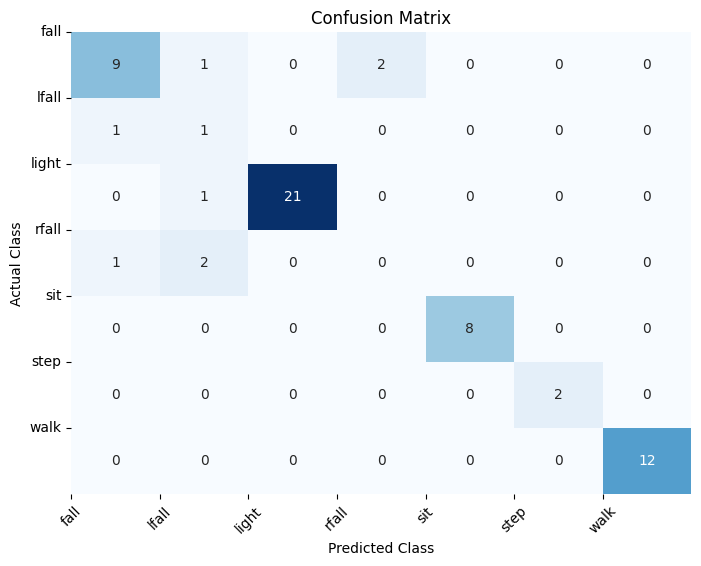

In [80]:
show_results(y_test, log_preds)

## HINGE LOSS

$L:Hinge(soft-margin):$ equivalent to Support Vector Classification.

$L(y_i,f(x_i))= max(0,1-y_if(x_i))$

In [81]:
hinge_preds = fit_linear_model(X_train,X_test,y_train, 'hinge', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.90
Balanced Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

        fall       0.83      0.83      0.83        12
       lfall       0.50      0.50      0.50         2
       light       1.00      1.00      1.00        22
       rfall       0.33      0.33      0.33         3
         sit       0.89      1.00      0.94         8
        step       1.00      1.00      1.00         2
        walk       1.00      0.92      0.96        12

    accuracy                           0.90        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.90      0.90      0.90        61



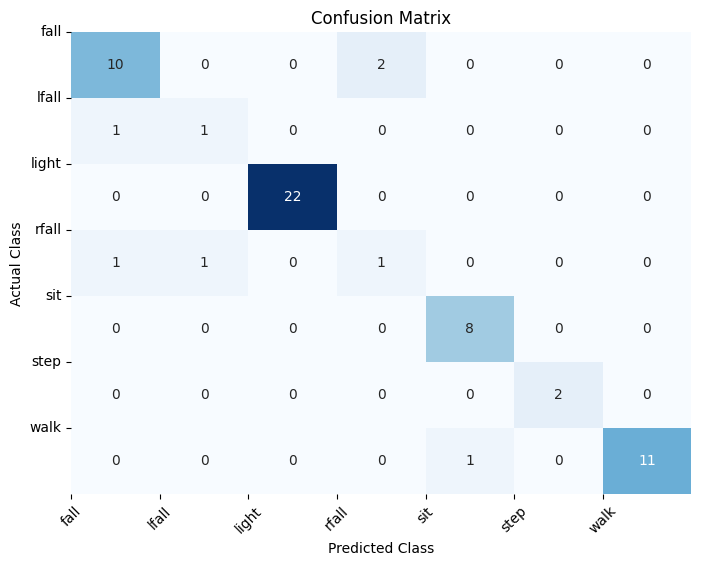

In [82]:
show_results(y_test, hinge_preds)

## SQUARED HINGE

In [83]:
squared_hinge = fit_linear_model(X_train,X_test,y_train, 'squared_hinge', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.82
Balanced Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

        fall       0.78      0.58      0.67        12
       lfall       0.20      0.50      0.29         2
       light       1.00      0.86      0.93        22
       rfall       0.20      0.33      0.25         3
         sit       1.00      1.00      1.00         8
        step       0.67      1.00      0.80         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.82        61
   macro avg       0.69      0.75      0.70        61
weighted avg       0.88      0.82      0.84        61



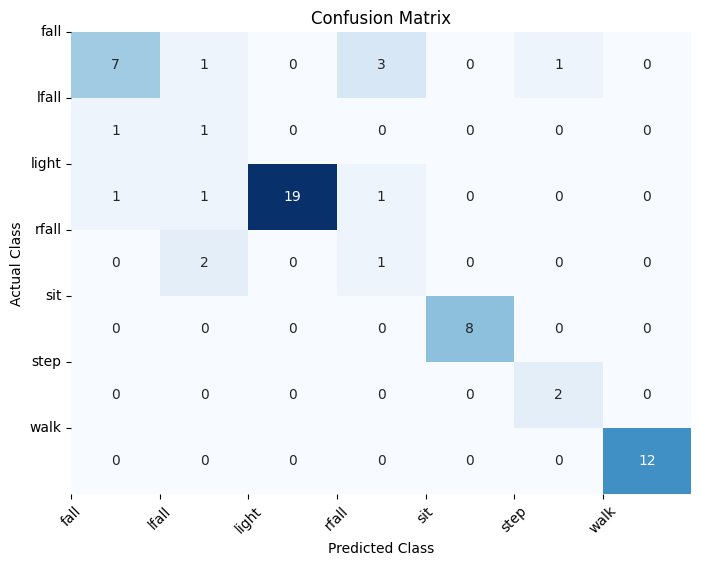

In [84]:
show_results(y_test,squared_hinge)

## PERCEPTRON

$L: Perceptron = L(y_i,f(x_i))= max(0,-y_if(x_i))$

In [85]:
perceptron_preds = fit_linear_model(X_train,X_test,y_train, 'perceptron', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.0001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.85
Balanced Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

        fall       0.86      0.50      0.63        12
       lfall       0.25      0.50      0.33         2
       light       1.00      1.00      1.00        22
       rfall       0.25      0.33      0.29         3
         sit       1.00      1.00      1.00         8
        step       0.50      1.00      0.67         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.85        61
   macro avg       0.69      0.76      0.70        61
weighted avg       0.89      0.85      0.86        61



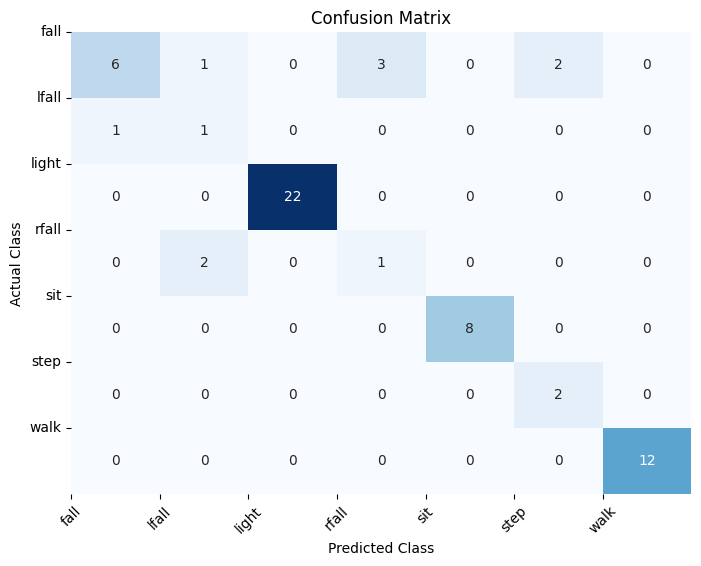

In [86]:
show_results(y_test,perceptron_preds)

## MODFIED HUBER

$L: Modified Huber = L(y_i,f(x_i)) = max(0,1-y_if(x_i))^2 ify_if(x_i)>1,$ and $L(y_i,f(x_i)) = -4y_if(x_i))$ otherwise

In [87]:
modified_huber_preds = fit_linear_model(X_train,X_test,y_train, 'modified_huber', 'balanced_accuracy')

Best Hyperparameters: {'alpha': 0.001, 'class_weight': 'balanced', 'penalty': 'l1'}
Accuracy: 0.82
Balanced Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

        fall       0.75      0.50      0.60        12
       lfall       0.00      0.00      0.00         2
       light       1.00      0.95      0.98        22
       rfall       0.17      0.33      0.22         3
         sit       1.00      1.00      1.00         8
        step       0.67      1.00      0.80         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.82        61
   macro avg       0.65      0.68      0.66        61
weighted avg       0.87      0.82      0.84        61



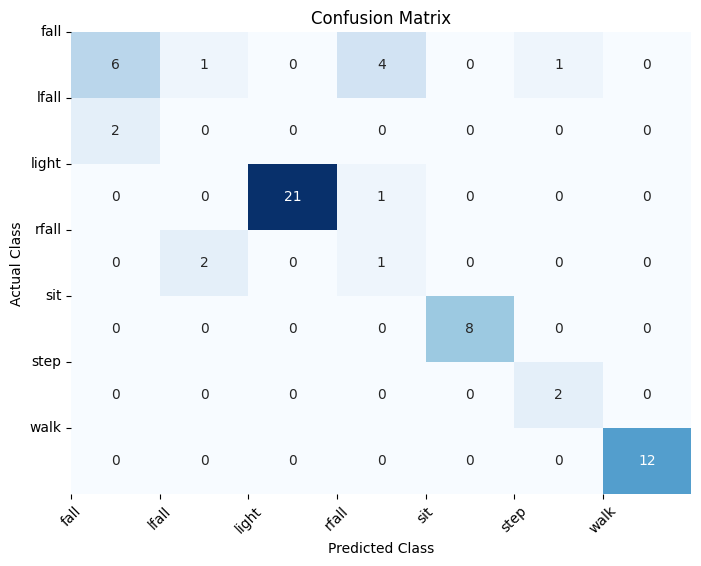

In [88]:
show_results(y_test,modified_huber_preds)

## QDA and LDA

Both LDA and QDA can be derived from simple probabilistic models which model the class conditional distribution of the data $P(X|y=k)$ for each class k. Predictions can then be obtained by using Bayes’ rule, for each training sample $x \in R^d$:

$$P(y=k|x)=\frac{P(x|y=k)P(y=k)}{P(x)} = \frac{P(x|y=k)P(y=k)}{\sum_l P(x|y=l)*P(y=l)} $$

and we select the class which maximizes this posterior probability.

More specifically, for linear and quadratic discriminant analysis, P(x|y) is modeled as a multivariate Gaussian distribution with density:

$$P(x|y=k)= \frac{1}{(2\pi)^{d/2}|\Sigma_k|^{1/2}}\exp(-\frac{1}{2}(x-\mu_k)^t\Sigma_k^{-1}(x-\mu_k))$$

where d is the number of features.

## Quadratic discriminant analysis

According to the model above, the log of the posterior is:

$$ log P(y=k|x)= logP(x|y=k)+logP(y=k)+Cst =-\frac{1}{2}log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^t\Sigma_k^{-1}(x-\mu_k)+logP(y=k)+Cst$$

where the constant term Cst corresponds to the denominator P(x), in addition to other constant terms from the Gaussian. The predicted class is the one that maximises this log-posterior.

**Relation with Gaussian Naive Bayes**

If in the QDA model one assumes that the covariance matrices are diagonal, then the inputs are assumed to be conditionally independent in each class, and the resulting classifier is equivalent to the Gaussian Naive Bayes classifier.

Best Hyperparameters: {}
Accuracy: 0.62
Balanced Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

        fall       0.59      0.83      0.69        12
       lfall       0.00      0.00      0.00         2
       light       0.56      0.91      0.69        22
       rfall       0.00      0.00      0.00         3
         sit       0.00      0.00      0.00         8
        step       0.00      0.00      0.00         2
        walk       1.00      0.67      0.80        12

    accuracy                           0.62        61
   macro avg       0.31      0.34      0.31        61
weighted avg       0.51      0.62      0.54        61



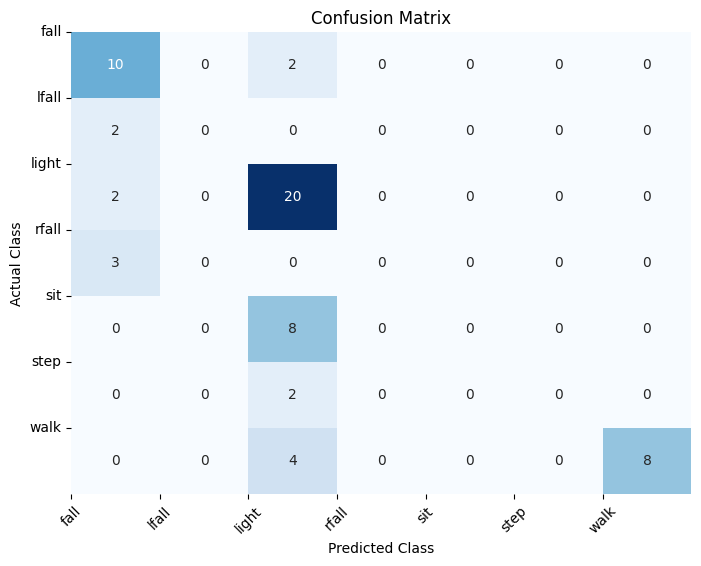

In [99]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def fit_qda_model(X_train,X_test, y_train, score):
    # Scale the features (may be useful if we are going to add other features with different scales)
    scaler = StandardScaler()
    #X = scaler.fit_transform(X.astype(np.float64))
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
    # Create a QDA classifier
    qda_classifier = QuadraticDiscriminantAnalysis()

    # Define a grid of hyperparameters (QDA doesn't have many hyperparameters to tune)
    param_grid = {}

    # Define Stratified Repeated K-Fold cross-validation
    stratified_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    # Create a GridSearchCV object with stratified repeated cross-validation
    grid_search = GridSearchCV(qda_classifier, param_grid, cv=stratified_cv, scoring=score)

    # Train the model with different hyperparameters and cross-validation
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model with the best hyperparameters
    best_model = grid_search.best_estimator_

    # Perform predictions using the best model
    y_pred = best_model.predict(X_test_scaled)

    return y_pred, grid_search.best_params_

# Call the function to fit and evaluate the QDA model
qda_fit = fit_qda_model(X_train,X_test, y_train, 'balanced_accuracy')

# Call the show_results function to display the evaluation metrics
show_results(y_test, qda_fit)


## Linear Discriminant Analysis

LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance matrix: $\Sigma_k=\Sigma$ for all k. This reduces the log posterior to:

$$logP(y=k|x)=-\frac{1}{2}(x-\mu_k)^t\Sigma^{-1}(x-\mu_k)+logP(y=k)+Cst$$

The term $(x-\mu_k)^t\sum^{-1}(x-\mu_k)$ corresponds to the Mahalanobis Distance between the sample and the mean $\mu_k$. The Mahalanobis distance tells how close $x$ is from $\mu_k$, while also accounting for the variance of each feature. We can thus interpret LDA as assigning $x$ to the class whose mean is the closest in terms of Mahalanobis distance, while also accounting for the class prior probabilities.

The log-posterior of LDA can also be written as:
$$logP(y=k|x)=\omega_k^tx+\omega_{k0}+Cst$$

where $\omega_k=\Sigma^{-1}\mu_k$ and $\omega_{k0} = -\frac{1}{2}\mu_k^t\Sigma^{-1}\mu_k+logP(y=k)$

These quantities correspond to the coef_ and intercept attributes, respectively. From the above formula, it is clear that LDA has a linear decision surface.

Assumption (A.lda): 

in each class k the joint distribution of the features is a multivariate normal centred on the mean vector $\mu_k$ , and
having a covariance matrix $\Sigma$ common to all classes, i.e.

$$X|Y=k \sim N(\mu_k ;\Sigma) \text{ for each k} = 1,2,...,K$$

Implications:

- the class conditional densities are $f_k (x) = (x;\mu_k ;\Sigma)$
- the scatter of the points in each class have elliptic-symmetric form
- since the features have covariance matrix in each class,
the assumption (A.lda) implies that in all classes the scatter of the
features has homogeneous geometric characteristics

LDA is also a 'linear classification method' because it produces linear decision boundaries. It can be shown that the LDA produces decision boundaries between classes that consist of straight lines (if p = 2), planes (p = 3), hyper-planes (when p > 3, as in our case).

Best Hyperparameters: {'shrinkage': None, 'solver': 'lsqr'}
Accuracy: 0.87
Balanced Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

        fall       0.75      0.75      0.75        12
       lfall       0.00      0.00      0.00         2
       light       1.00      0.95      0.98        22
       rfall       0.33      0.33      0.33         3
         sit       1.00      1.00      1.00         8
        step       1.00      1.00      1.00         2
        walk       1.00      1.00      1.00        12

    accuracy                           0.87        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.89      0.87      0.88        61



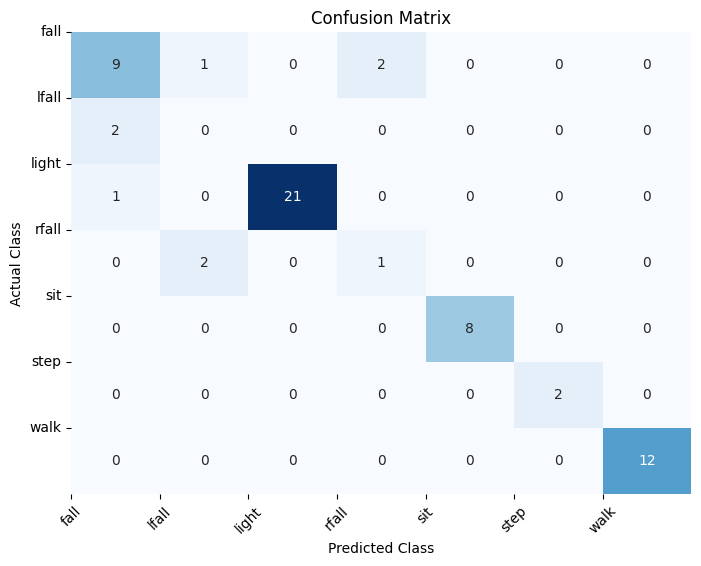

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def fit_lda_model(X_train,X_test, y_train, score):
    # Scale the features (may be useful if we are going to add other features with different scales)
    scaler = StandardScaler()
    #X = scaler.fit_transform(X.astype(np.float64))
    X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
    X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
    
    # Create an LDA classifier
    lda_classifier = LinearDiscriminantAnalysis()

    # Define a grid of hyperparameters (LDA doesn't have many hyperparameters to tune)
    param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
                  'shrinkage':[None, 'auto'],
                  }

    # Define Stratified Repeated K-Fold cross-validation
    stratified_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

    # Create a GridSearchCV object with stratified repeated cross-validation
    grid_search = GridSearchCV(lda_classifier, param_grid, cv=stratified_cv, scoring=score)

    # Train the model with different hyperparameters and cross-validation
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model with the best hyperparameters
    best_model = grid_search.best_estimator_

    # Perform predictions using the best model
    y_pred = best_model.predict(X_test_scaled)

    return y_pred, grid_search.best_params_

# Call the function to fit and evaluate the LDA model
lda_fit = fit_lda_model(X_train,X_test, y_train, 'balanced_accuracy')

# Call the show_results function to display the evaluation metrics
show_results(y_test, lda_fit)


## Deep Learning

In [12]:
## (CNN-HE)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess your dataset (replace this with your actual data loading and preprocessing code)
# Here, we create a sample dataset for demonstration purposes.
# Replace this with your actual data loading code.
data = flat_data

# Assuming your dataset has the following structure:
# - Columns 0 to 1199: Accelerometer data (X, Y, Z)
# - Columns 1200 to 2399: Gyroscope data (X, Y, Z)
# - Column 2400: Label (e.g., 'fall', 'rfall', 'lfall', 'light', 'sit', 'walk', 'step')

# Extract features (accelerometer and gyroscope data) and labels
X = data.iloc[:, :2400].values
y = data.iloc[:, 2400].values

# Convert string labels to numerical class indices
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to have 3D shape (number of samples, number of time steps, number of channels)
X_train = X_train.reshape(-1, 2400, 1)
X_test = X_test.reshape(-1, 2400, 1)

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes=7)  # Adjust the number of classes (7 in this case)
y_test = keras.utils.to_categorical(y_test, num_classes=7)

# Define the input shape
input_shape = (2400, 1)

# Create the Sequential model for CNN-HE
model = keras.Sequential()

# Add convolutional and pooling layers for CNN-HE
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))  # Adjust output neurons to 7 for classification

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Calculate balanced accuracy on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
balanced_acc = balanced_accuracy_score(y_test.argmax(axis=1), y_pred_classes)
print(f"Balanced Accuracy: {balanced_acc}")


Epoch 1/20
4/4 [==============================] - 2s 193ms/step - loss: 7.7190 - accuracy: 0.1813 - val_loss: 4.6197 - val_accuracy: 0.2653
Epoch 2/20
4/4 [==============================] - 1s 141ms/step - loss: 1.6113 - accuracy: 0.6166 - val_loss: 2.0819 - val_accuracy: 0.5102
Epoch 3/20
4/4 [==============================] - 1s 142ms/step - loss: 1.3528 - accuracy: 0.6114 - val_loss: 1.0898 - val_accuracy: 0.5918
Epoch 4/20
4/4 [==============================] - 1s 144ms/step - loss: 0.6817 - accuracy: 0.7254 - val_loss: 1.0326 - val_accuracy: 0.7347
Epoch 5/20
4/4 [==============================] - 1s 148ms/step - loss: 0.5115 - accuracy: 0.8912 - val_loss: 0.8652 - val_accuracy: 0.7347
Epoch 6/20
4/4 [==============================] - 1s 145ms/step - loss: 0.3093 - accuracy: 0.8964 - val_loss: 0.7165 - val_accuracy: 0.7347
Epoch 7/20
4/4 [==============================] - 1s 139ms/step - loss: 0.2382 - accuracy: 0.9275 - val_loss: 0.6686 - val_accuracy: 0.6939
Epoch 8/20
4/4 [====

In [15]:
## (CNN-3B3Conv) 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess your dataset (replace this with your actual data loading and preprocessing code)
# Here, we create a sample dataset for demonstration purposes.
# Replace this with your actual data loading code.
data = flat_data

# Assuming your dataset has the following structure:
# - Columns 0 to 1199: Accelerometer data (X, Y, Z)
# - Columns 1200 to 2399: Gyroscope data (X, Y, Z)
# - Column 2400: Label (e.g., 'fall', 'rfall', 'lfall', 'light', 'sit', 'walk', 'step')

# Extract features (accelerometer and gyroscope data) and labels
X = data.iloc[:, :2400].values
y = data.iloc[:, 2400].values

# Perform one-hot encoding on labels
y = pd.get_dummies(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to have 3D shape (number of samples, number of time steps, number of channels)
X_train = X_train.reshape(-1, 2400, 1)
X_test = X_test.reshape(-1, 2400, 1)

# Define the input shape
input_shape = (2400, 1)

# Create the Sequential model
model = keras.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv1D(128, kernel_size=4, activation='relu', input_shape=input_shape))
model.add(layers.Conv1D(128, kernel_size=4, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y.shape[1], activation='softmax'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Epoch 1/20
4/4 [==============================] - 5s 849ms/step - loss: 2.0016 - accuracy: 0.1554 - val_loss: 1.7555 - val_accuracy: 0.2857
Epoch 2/20
4/4 [==============================] - 3s 732ms/step - loss: 1.5660 - accuracy: 0.4767 - val_loss: 1.5039 - val_accuracy: 0.5306
Epoch 3/20
4/4 [==============================] - 3s 727ms/step - loss: 1.0499 - accuracy: 0.6632 - val_loss: 1.1545 - val_accuracy: 0.6327
Epoch 4/20
4/4 [==============================] - 3s 748ms/step - loss: 0.7598 - accuracy: 0.7927 - val_loss: 0.9774 - val_accuracy: 0.7143
Epoch 5/20
4/4 [==============================] - 3s 679ms/step - loss: 0.6176 - accuracy: 0.7824 - val_loss: 0.7883 - val_accuracy: 0.7143
Epoch 6/20
4/4 [==============================] - 3s 761ms/step - loss: 0.4623 - accuracy: 0.8238 - val_loss: 0.7488 - val_accuracy: 0.7347
Epoch 7/20
4/4 [==============================] - 3s 739ms/step - loss: 0.4352 - accuracy: 0.8290 - val_loss: 0.9789 - val_accuracy: 0.7347
Epoch 8/20
4/4 [====

In [16]:
## CNN-EDU


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess your dataset (replace this with your actual data loading and preprocessing code)
# Here, we create a sample dataset for demonstration purposes.
# Replace this with your actual data loading code.
data = flat_data

# Assuming your dataset has the following structure:
# - Columns 0 to 1199: Accelerometer data (X, Y, Z)
# - Columns 1200 to 2399: Gyroscope data (X, Y, Z)
# - Column 2400: Label (e.g., 'fall', 'rfall', 'lfall', 'light', 'sit', 'walk', 'step')

# Extract features (accelerometer and gyroscope data) and labels
X = data.iloc[:, :2400].values
y = data.iloc[:, 2400].values

# Perform one-hot encoding on labels
y = pd.get_dummies(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to have 3D shape (number of samples, number of time steps, number of channels)
X_train = X_train.reshape(-1, 2400, 1)
X_test = X_test.reshape(-1, 2400, 1)

# Define the input shape
input_shape = (2400, 1)

# Create the Sequential model
model = keras.Sequential()

# Add convolutional and pooling layers for CNN-EDU
model.add(layers.Conv1D(16, kernel_size=5, activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(32, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(128, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(y.shape[1], activation='softmax'))

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Epoch 1/20
4/4 [==============================] - 2s 202ms/step - loss: 1.8233 - accuracy: 0.3212 - val_loss: 1.6984 - val_accuracy: 0.3469
Epoch 2/20
4/4 [==============================] - 1s 158ms/step - loss: 1.5333 - accuracy: 0.4197 - val_loss: 1.5145 - val_accuracy: 0.3878
Epoch 3/20
4/4 [==============================] - 1s 168ms/step - loss: 1.3261 - accuracy: 0.4715 - val_loss: 1.4127 - val_accuracy: 0.4898
Epoch 4/20
4/4 [==============================] - 1s 165ms/step - loss: 1.0970 - accuracy: 0.6166 - val_loss: 1.2498 - val_accuracy: 0.6531
Epoch 5/20
4/4 [==============================] - 1s 169ms/step - loss: 0.8479 - accuracy: 0.7306 - val_loss: 1.0981 - val_accuracy: 0.6735
Epoch 6/20
4/4 [==============================] - 1s 167ms/step - loss: 0.7616 - accuracy: 0.7772 - val_loss: 0.8068 - val_accuracy: 0.6939
Epoch 7/20
4/4 [==============================] - 1s 148ms/step - loss: 0.4634 - accuracy: 0.8549 - val_loss: 0.7723 - val_accuracy: 0.7347
Epoch 8/20
4/4 [====

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess your dataset (replace this with your actual data loading and preprocessing code)
# Here, we create a sample dataset for demonstration purposes.
# Replace this with your actual data loading code.
data = flat_data

# Assuming your dataset has the following structure:
# - Columns 0 to 1199: Accelerometer data (X, Y, Z)
# - Columns 1200 to 2399: Gyroscope data (X, Y, Z)
# - Column 2400: Label (e.g., 'fall', 'rfall', 'lfall', 'light', 'sit', 'walk', 'step')

# Extract features (accelerometer and gyroscope data) and labels
X = data.iloc[:, :2400].values
y = data.iloc[:, 2400].values

# Convert string labels to numerical class indices
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the input shape
input_shape = (2400,)  # For a feedforward network, we use a 1D input shape

# Create the Sequential model for the complex neural network
model = keras.Sequential()

# Add input layer
model.add(layers.Input(shape=input_shape))

# Add hidden layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Add dropout for regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))  # Add dropout for regularization

# Output layer
model.add(layers.Dense(7, activation='softmax'))  # Adjust output neurons to 7 for classification

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Calculate balanced accuracy on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
balanced_acc = balanced_accuracy_score(y_test, y_pred_classes)
print(f"Balanced Accuracy: {balanced_acc}")


Epoch 1/50
2/2 [==============================] - 1s 340ms/step - loss: 2.5886 - accuracy: 0.1917 - val_loss: 1.7022 - val_accuracy: 0.6531
Epoch 2/50
2/2 [==============================] - 0s 84ms/step - loss: 1.3680 - accuracy: 0.5699 - val_loss: 1.5812 - val_accuracy: 0.5918
Epoch 3/50
2/2 [==============================] - 0s 79ms/step - loss: 0.9922 - accuracy: 0.7254 - val_loss: 1.4067 - val_accuracy: 0.5510
Epoch 4/50
2/2 [==============================] - 0s 84ms/step - loss: 0.7894 - accuracy: 0.7565 - val_loss: 0.8702 - val_accuracy: 0.6327
Epoch 5/50
2/2 [==============================] - 0s 108ms/step - loss: 0.5711 - accuracy: 0.8238 - val_loss: 0.6020 - val_accuracy: 0.7959
Epoch 6/50
2/2 [==============================] - 0s 97ms/step - loss: 0.5109 - accuracy: 0.7927 - val_loss: 0.6132 - val_accuracy: 0.7551
Epoch 7/50
2/2 [==============================] - 0s 95ms/step - loss: 0.4432 - accuracy: 0.8549 - val_loss: 0.9007 - val_accuracy: 0.7551
Epoch 8/50
2/2 [=========